Importing libraries that may be required

In [281]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

Sine curve with some random noise

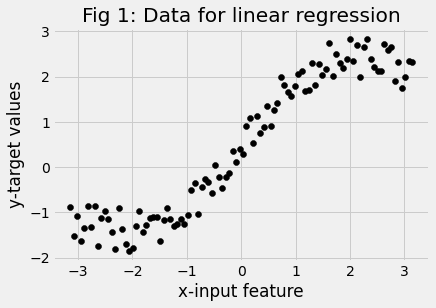

In [282]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.figure(figsize=(6,4))
plt.scatter(x,y,color='black')#Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()

Sine Curve from 60 degree to 300 degree

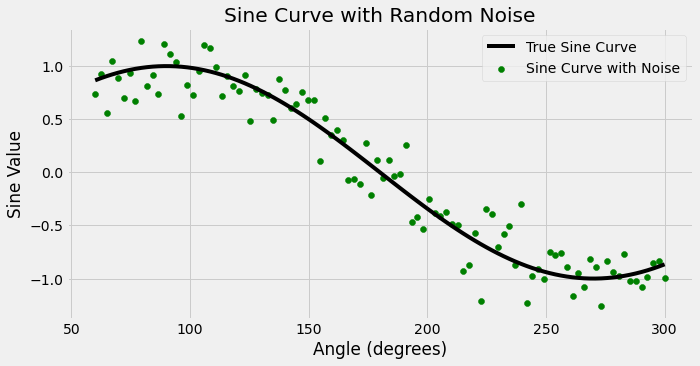

In [283]:
angles = np.linspace(60, 300, 100)
sine_values = np.sin(np.radians(angles))
noise = np.random.normal(0, 0.2, len(angles))
sine_values_with_noise = sine_values + noise
plt.figure(figsize=(10, 5))
plt.scatter(angles, sine_values_with_noise, label='Sine Curve with Noise', color='green')
plt.plot(angles, sine_values, label='True Sine Curve', color='black')

plt.title('Sine Curve with Random Noise')
plt.xlabel('Angle (degrees)')
plt.ylabel('Sine Value')
plt.legend()
plt.grid(True)
plt.show()

Reading the Food Truck dataset

In [284]:
df2=pd.read_csv('food_truck_data.txt')
df2.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [285]:
df2.shape

(97, 2)

Plotting a Scatter plot of population and profit

Text(0, 0.5, 'Profit')

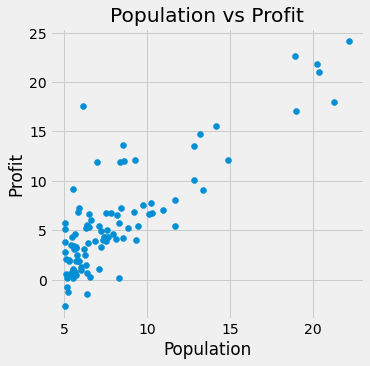

In [314]:
plt.figure(figsize=(5,5))
plt.scatter(df2['Population'],df2['Profit'])
plt.title("Population vs Profit")
plt.xlabel('Population')
plt.ylabel('Profit')

Defining a cost function

In [287]:
def cost_function(x,y,theta):
    m=len(y)
    y_pred=x.dot(theta)
    error=(y_pred-y)**2
    return 1/(2*m)*np.sum(error)

In [288]:
m=df2.Population.size
X2=np.append(np.ones((m,1)),df2.Population.values.reshape(m,1),axis=1)
Y2=df2.Profit.values.reshape(m,1)
theta=np.zeros((2,1))
cost_function(X2,Y2,theta)

32.072733877455676

Defining a gradient descent function

In [289]:
def gradient_descent(x,y,theta,alpha,iterations):
    m=len(y)
    costs=[]
    for i in range(iterations):
        y_pred=x.dot(theta)
        error=np.dot(x.transpose(),(y_pred-y))
        theta=theta-alpha*1/m*error
        costs.append(cost_function(x,y,theta))
    return theta,costs

Getting the Regression Line

In [290]:
theta,costs=gradient_descent(X2,Y2,theta,alpha=0.01,iterations=1)
print("h(x)= {} + {}x1".format(str(round(theta[0,0],2)),str(round(theta[1,0],2))))

h(x)= 0.06 + 0.65x1


Creating a prediction function

In [291]:
def predict(x,theta):
    y_pred=theta[0][0]+x*theta[1][0]
    return y_pred

Visualization of Cost Function

In [292]:
from mpl_toolkits.mplot3d import Axes3D

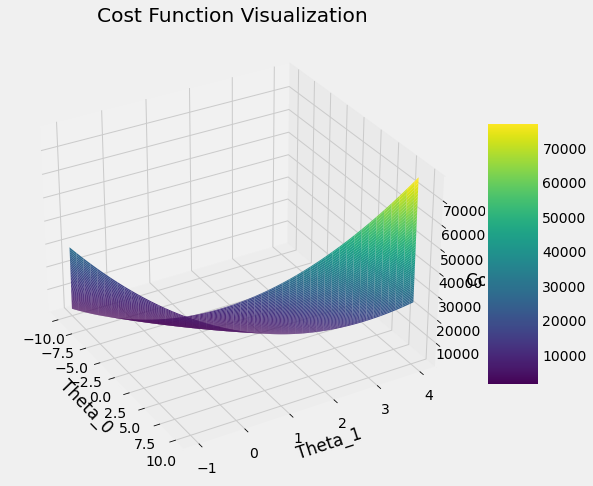

In [293]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)
cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X2, Y2, t)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis') 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("Theta_0")
plt.ylabel("Theta_1")
ax.set_zlabel("Cost")
ax.view_init(30, 330)
plt.title("Cost Function Visualization")
plt.show()

Plotting Convergence of JTheta

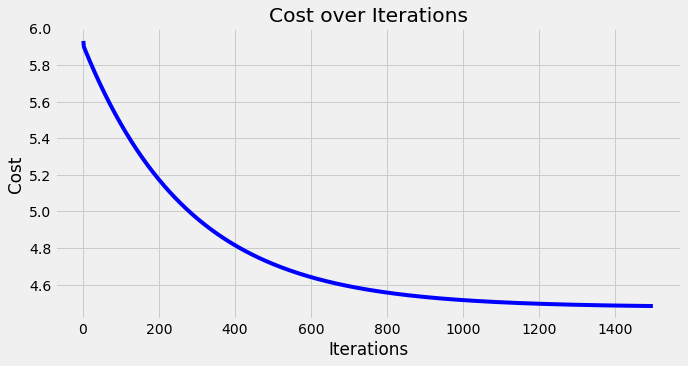

In [294]:
alpha = 0.01
iterations = 1500
theta, costs = gradient_descent(X2, Y2, theta, alpha, iterations)
plt.figure(figsize=(10, 5))
plt.plot(range(1, iterations + 1), costs, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.show()

Plotting the regression line and the earlier scatter plot

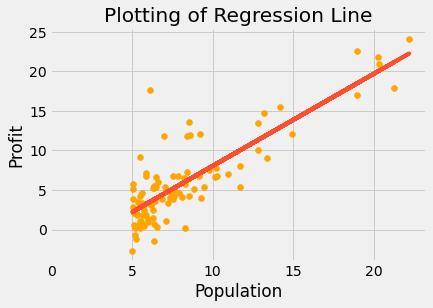

In [295]:
Y2P=[]
for i in X2:
    Y2P.append(predict(i,theta))
plt.plot(X2,Y2P)
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Plotting of Regression Line")
plt.scatter(df2['Population'],df2['Profit'],color='orange')

Value of theta

In [296]:
theta[1]

array([1.16641043])

Finding out Root Mean Squared Error

In [297]:
rmse=0
for i in range(len(df2.Profit)):
    yp=predict(df2.Profit[i],theta)
    rmse+=(abs(yp**2-df2.Population[i]**2))
print("RMSE: ",math.sqrt(rmse)/len(df2.Profit))

RMSE:  0.7080611591786558


Reading the House Price Dataset

In [298]:
df1=pd.read_csv('home.csv')
df1.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Getting values of x,y

In [299]:
x=np.array(df1['sqft_living'].values)
y=np.array(df1['price'].values)

In [300]:
x.shape

(21613,)

In [301]:
x = x.reshape(-1, 1)

Simple Linear Regression

In [302]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Splitting the data into Train/Test

In [303]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

Fitting the model

In [304]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [305]:
print("Train Score",model.score(x_train,y_train))
print("Test Score",model.score(x_test,y_test))

Train Score 0.4923838367820874
Test Score 0.4940690470123985


Plotting the Model

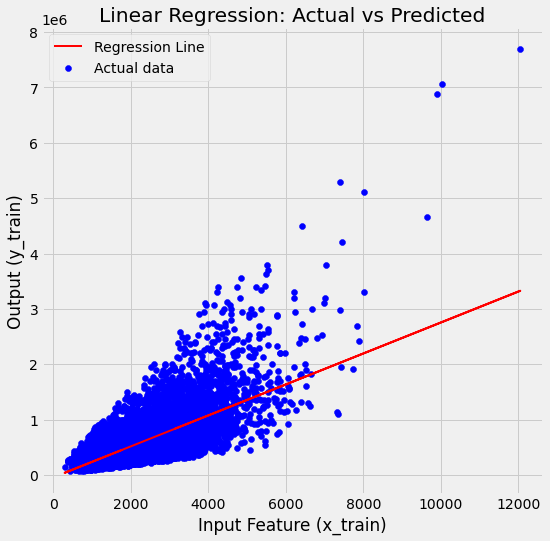

In [306]:
y_pred = model.predict(x_train)
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, color='blue', label='Actual data')
plt.plot(x_train, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Input Feature (x_train)')
plt.ylabel('Output (y_train)')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

Ridge Linear Regression

In [307]:
from sklearn.linear_model import Ridge

In [308]:
ridgemodel=Ridge(alpha=50,max_iter=100,tol=0.1)
ridgemodel.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [309]:
print("Train Score",ridgemodel.score(x_train,y_train))
print("Test Score",ridgemodel.score(x_test,y_test))

Train Score 0.4923838367820874
Test Score 0.4940690469535862


Lasso Linear Regression

In [310]:
from sklearn.linear_model import Lasso

In [311]:
lassomodel=Lasso(alpha=50,max_iter=100,tol=0.1)
lassomodel.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [312]:
print("Train Score",lassomodel.score(x_train,y_train))
print("Test Score",lassomodel.score(x_test,y_test))

Train Score 0.4923838367820642
Test Score 0.4940690433749376
